# MSBA 605-77 - Python for Analytics
## Problem Solving Exercise 5, Part 2
### Logisitics
1. Get into your weekly group.
1. Discuss and complete the assignment __together__. Don’t just assign different problems to each teammate! That defeats the purpose of team-based learning.
1. Choose a recorder to prepare the final copy to submit to instructor in Blackboard. __Only one person needs to submit__ on behalf of the team.

__Names of group members__: ADD HERE (double click the cell in Jupyter to edit)<br>
__Due__: Sunday, November 5 (by 11:59 PM)

Add your code to the cells below. When finished, be sure to save your notebook, then _Close and Shutdown Notebook_ from the _File_ menu. Return to Blackboard and have recorder upload your completed Notebook file (`PSE5-Part2.ipynb`) on behalf of the group.

In [1]:
import numpy as np  
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

> __Note__: If you installed Miniconda and created the `pydata-book` environment as directed in [Section 1.4](https://wesmckinney.com/book/preliminaries#installation_and_setup), you will need to install scikit-learn before you use it, using `conda install scikit-learn` at the Anaconda prompt or Terminal. You will need to shut down Jupyter before you use conda to install the scikit-learn module as above.

## Part 2

### Problem 1
In our Intro to Machine Learning Notebook, we visualized the Digits dataset's clusters using scikit-learn's TSNE estimator to reduce the dataset's 64 features down to two, then plotted the results using Seaborn. Reimplement that example to perform dimensionality reduction using scikit-learn's PCA estimator (as demonstrated on the Iris dataset in the notebook), then plot the results. How do the clusters compare to the diagram we created in the clustering case study using TSNE? (5 pts.)
#### OR
In our Intro to Machine Learning Notebook, we visualized the Iris dataset's clusters using scikit-learn's PCA estimator to reduce the dataset's four features down to two, then plotted the results using Seaborn. Reimplement that example to perform dimensionality reduction using scikit-learn's TSNE estimator (as demonstrated on the Digits dataset in the notebook), then plot the results. How do the clusters compare to the diagram we created in the clustering case study using PCA? (5 pts.)

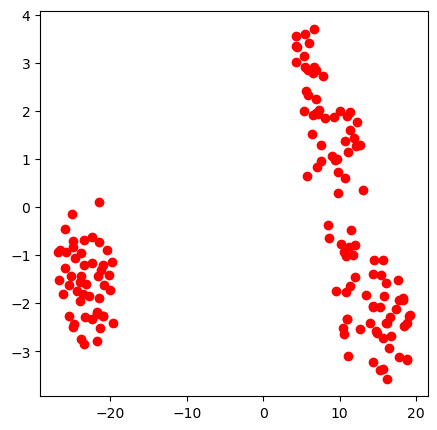

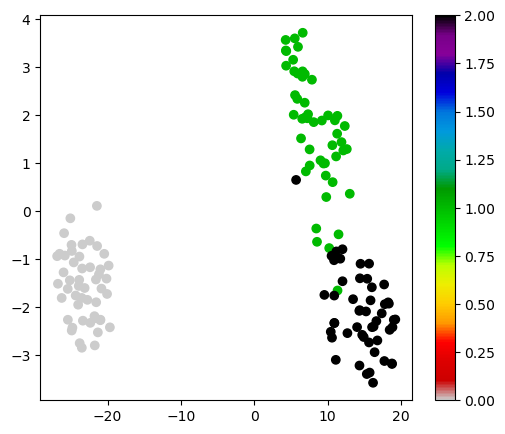

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=11)
reduced_data = tsne.fit_transform(iris.data)
figure = plt.figure(figsize=(5, 5))
dots = plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c='red')
figure = plt.figure(figsize=(6, 5))
dots = plt.scatter(reduced_data[:, 0], reduced_data[:, 1],
     c=iris.target, cmap=plt.colormaps['nipy_spectral_r'])
colorbar = plt.colorbar(dots)

### Problem 2
In our Intro to Machine Learning Notebook, we analyzed the Digits dataset and used scikit-learn's `KNeighborsClassifier` to recognize the digits with high accuracy. Let's find out if humans can recognize the digit images as well as the `KNeighborsClassifier` did! In the code cell below, create a script that randomly selects and displays individual digit images and asks the user to enter a digit from 0 to 9 that they think the image represents. Use a `while` loop that allows the user to choose to stop or try another digit image after each guess. The `IPython.display` module has a handy [`clear_output` function](https://ipython.org/ipython-doc/3/api/generated/IPython.display.html#IPython.display.clear_output) that can be used to remove the output below a cell in a notebook. Your code will display each new digit image one below the other if you don't use the `IPython.display` module's `clear_output`. (10 pts.)

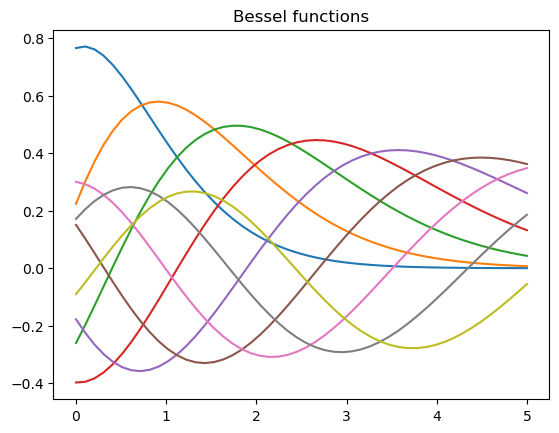

In [4]:
# Example showing clear_output used for simple animation
# From: https://notebook.community/CestDiego/emacs-ipython-notebook/tests/notebook/nbformat4/Animations%20Using%20clear_output
import sys
import time
from scipy.special import jn
from IPython.display import display, clear_output
x = np.linspace(0,5)
f, ax = plt.subplots()
ax.set_title("Bessel functions")

for n in range(1,10):
    time.sleep(1)
    ax.plot(x, jn(x,n))
    clear_output(wait=True)
    display(f)

# close the figure at the end, so we don't get a duplicate
# of the last plot
plt.close()

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.datasets import load_digits
from IPython.display import display, clear_output

digits = load_digits()
X, y = digits.data, digits.target

while True:

    index = random.randint(0, len(X))
    image = X[index].reshape(8, 8)

    plt.imshow(image, cmap=plt.cm.gray_r)
    plt.axis('off')
    plt.show()

 
    guess_user= input("Enter a digit from 0-9: ")

    if guess_user.isdigit() and 0 <= int(guess_user) <= 9:
        guess_user = int(user_guess)
        true_digit = y[index]
        if guess_user == true_digit:
            print("Correct!", true_digit)
        else:
            print("Incorrect.", true_digit)
    else:
        print("Invalid input. Please enter a digit from 0 to 9.")

    # Ask if the user wants to continue
    continue_playing = input("Do you want to try another image? (yes/no): ").lower()
    clear_output(wait=True)

    if continue_playing != "yes":
        break

print("Thank you!")


Thank you!


### Problem 3
In our Intro to Machine Learning Notebook, we used unsupervised learning with the Iris dataset to cluster its samples. This dataset is actually labeled, though, so it can be used with scikit-learn's supervised machine learning estimators. Use the techniques you learned in the Digits dataset classification case study to load the Iris dataset and perform classification on it with the k-nearest neighbors algorithm. Use a `KNeighborsClassifier` with the default `k` value. Print a classification report and visualize the confusion matrix using a heatmap. What prediction accuracy did you achieve? (10 pts).

Report On Classification:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



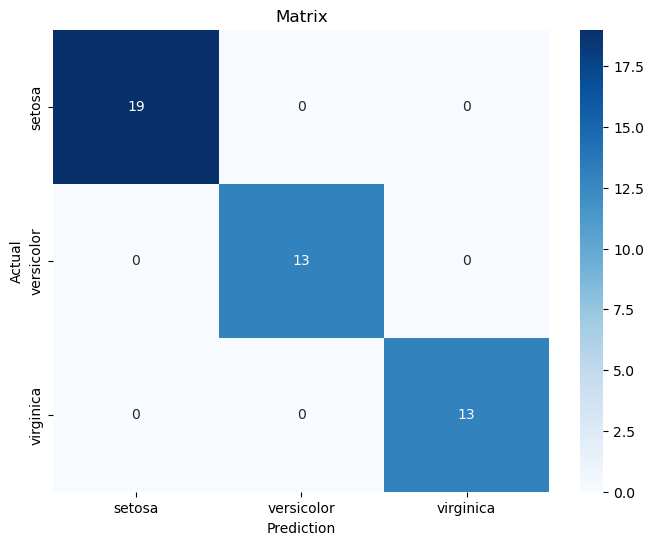

Accuracy: 100.00%


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

iris = load_iris()
X, y = iris.data, iris.target

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=42)

knn = KNeighborsClassifier()

knn.fit(X_train, y_train)

pred_y = knn.predict(X_test)

target_names = iris.target_names
print("Report On Classification:")
print(classification_report(test_y, pred_y, target_names=target_names))

confusion_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title('Matrix')
plt.show()

accuracy = np.mean(pred_y == test_y)
print(f"Accuracy: {accuracy * 100:.2f}%")


### Problem 4 - Extra Credit
For __5 pts. Extra Credit__, use scikit-learn's `KFold` class and `cross_val_score` function to perform hyperparameter tuning to determine the optimal `k` value for classifying the Iris dataset samples from above using a `KNeighborsClassifier`. Use odd `k` values from 1 - 19 (inclusive) as shown in our Intro to Machine Learning Notebook.

In [ ]:
# Add your code here

### Problem 5 - Extra Credit
For __5 pts. Extra Credit__, test multiple classification estimators for classifying the Iris dataset samples from above and compare the results to see which one performs the best. As in shown in our Intro to Machine Learning Notebook Digits dataset example, test the `KNeighborsClassifier`, `SVC`, and `GaussianNB` estimators. 

In [ ]:
# Add your code here